<a href="https://colab.research.google.com/github/arthurjacom/Machine_Learning/blob/main/census_income/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import graphviz
import pydotplus

from IPython.display import Image 
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Getting the data
adlt = pd.read_csv('adult.csv')

In [3]:
#Exploring the dataset
adlt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
adlt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#Check null values
adlt.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
#Pre-processing
pre = preprocessing.LabelEncoder()

In [7]:
adlt['workclass'] = pre.fit_transform(adlt['workclass'])
adlt['occupation'] = pre.fit_transform(adlt['occupation'])
adlt['relationship'] = pre.fit_transform(adlt['relationship'])
adlt['race'] = pre.fit_transform(adlt['race'])
adlt['sex'] = pre.fit_transform(adlt['sex'])
adlt['native.country'] = pre.fit_transform(adlt['native.country'])
adlt['income'] = pre.fit_transform(adlt['income'])

In [8]:
#Excluding unnecessary columns
adlt.drop(['fnlwgt', 'education', 'marital.status'], axis=1, inplace=True)

In [9]:
adlt.describe(include='all')

,age,workclass,education.num,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,10.080679,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,2.572720,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,9.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,10.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,12.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,16.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [10]:
#Model
X_train, X_test, y_train, y_test = train_test_split(adlt.drop('income',axis=1), adlt['income'], test_size=0.30, random_state=100)

In [11]:
dectree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
dectree = dectree.fit(X_train, y_train)

In [12]:
#Prediction
treepred = dectree.predict(X_test) 
treepred

array([0, 0, 0, ..., 1, 1, 0])

In [13]:
#Picture of the Decision Tree 
dot_data = tree.export_graphviz(dectree, out_file=None, label='all', impurity=False, proportion=True, 
                               feature_names=list(X_train), class_names=['<50k', '>50k'],
                               filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
graph

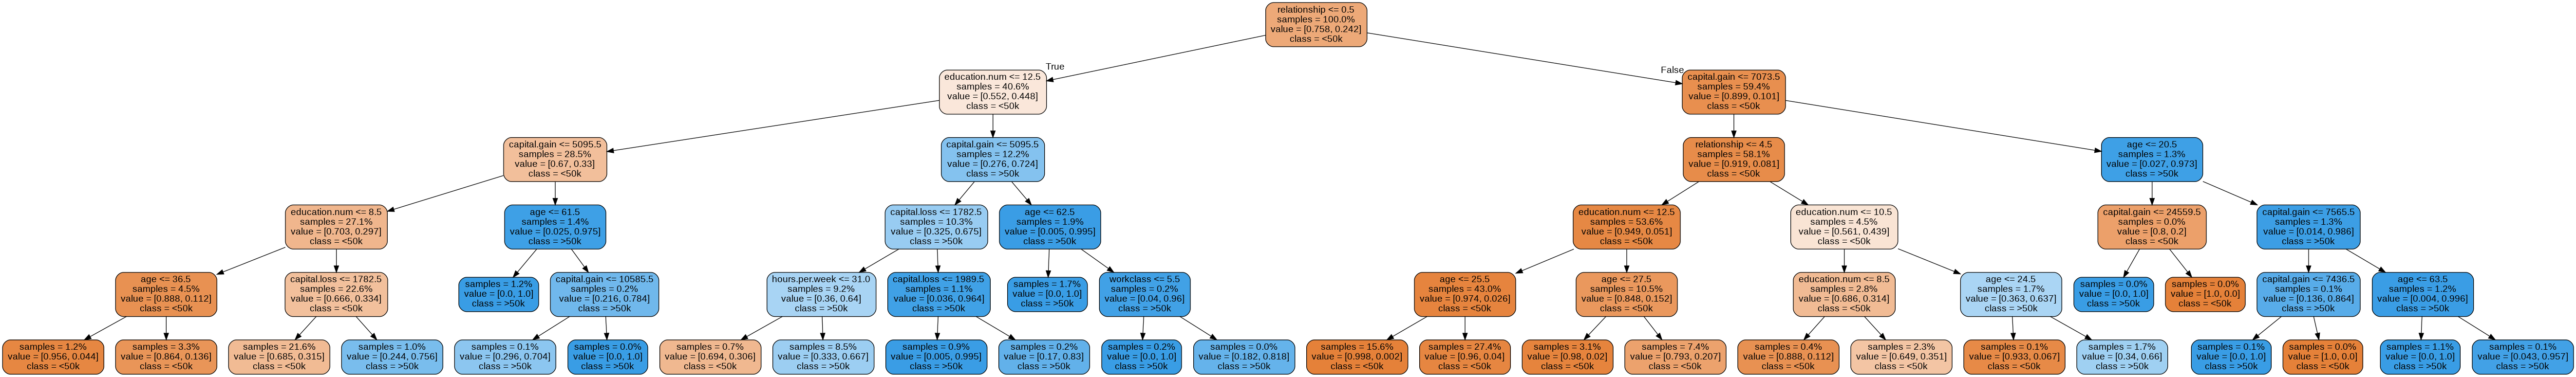

In [14]:
Image(graph.create_png())

In [15]:
#Evaluate
prectree = str(round(dectree.score(X_test,y_test) * 100, 2))+"%" #Medindo a preciso do modelo
print("A acurácia do modelo Árvore de Decisões foi", prectree)

A acurácia do modelo Árvore de Decisões foi 85.45%


In [18]:
#Confusion Matrix
print("\nConfusion Matrix:\n",
pd.crosstab(y_test, treepred, rownames=['Real'], colnames=['Predito'],
margins=True, margins_name='Todos'))


Confusion Matrix:
 Predito     0     1  Todos
Real                      
0        7080   361   7441
1        1060  1268   2328
Todos    8140  1629   9769


In [17]:
#Classification Report
print(classification_report(y_test, treepred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7441
           1       0.78      0.54      0.64      2328

    accuracy                           0.85      9769
   macro avg       0.82      0.75      0.77      9769
weighted avg       0.85      0.85      0.84      9769

